In [28]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import folium
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Twitter # 바뀌기 전의 이름
from konlpy.tag import Okt  # 바뀐 이름
from konlpy.corpus import kolaw
import nltk

font_name = fm.FontProperties(fname='C:/windows/Fonts/malgun.ttf').get_name()
plt.rc('font',family =font_name)
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [44]:
youtube = pd.read_csv('./Hyojin/Hyojin_info.csv',encoding='euc-kr',index_col= 'name')
youtube
youtube.columns
#youtube = youtube.loc[youtube['view'].str.contains('만회',na=False)]

views = []
for i in youtube['view']:
    if '만회' in i :
        views.append(float(i.split('만회')[0])*10000)
    elif '천회' in i:
        views.append(float(i.split('천회')[0])*1000)
    elif '회' in i :
        views.append(float(i.split('회')[0]))
        
youtube['조회수']= views

youtube['조회수'].astype('int')
youtube['조회수']= youtube['조회수'].astype('int')

comment1=[]
for i in youtube['comment']:
    i = (i.split(' ')[1].split('개')[0])
    if ',' in i:
        i = i.split(',')[0]+i.split(',')[1]
    
    comment1.append(int(i))    
    
comment1
youtube['댓글수']= comment1

like =[]
for i in youtube['likes_num']:
    if '만개' in i :
        like.append(float(i.split('만개')[0])*10000)
    elif '천개' in i:
        like.append(float(i.split('천개')[0])*1000)
    elif '개' in i :
        like.append(float(i.split('개')[0]))
    
like
youtube['좋아요수'] = like
youtube['좋아요수'] = youtube['좋아요수'].astype('int')

unlike =[]
for i in youtube['unlikes_num']:
    if '만개' in i :
        unlike.append(float(i.split('만개')[0])*10000)
    elif '천개' in i:
        unlike.append(float(i.split('천개')[0])*1000)
    elif '개' in i :
        unlike.append(float(i.split('개')[0]))
    
unlike
youtube['싫어요수']=unlike
youtube['싫어요수']=youtube['싫어요수']

time = []
for i in youtube['time_duration']:
    a=int(i.split('\n')[1].split(':')[0])
    b= int(i.split('\n')[1].split(':')[1])
    time.append((60*a)+b)
youtube['영상길이']= time

del youtube['time_duration']
del youtube['video_url']
del youtube['thumbnail']
del youtube['Unnamed: 0']
del youtube['view']
del youtube['previous_time']
del youtube['start_date']
del youtube['comment']
del youtube['likes_num']
del youtube['unlikes_num']
youtube



,조회수,댓글수,좋아요수,싫어요수,영상길이
name,,,,,
이게 바로 사회적 거리두기 효진쓰 생일파티...?? (feat.미역국 만들기),110000,164,2500,43.0,1162
?? 피부가 투명해지는 청순 메이크업 ??: MLBB MAKEUP,160000,255,3300,38.0,383
막걸리 마시면서 Q&A :: 조효진은 어떤사람인가? 그리고 고민상담,240000,349,5200,48.0,1657
"(ENG) 홍대언니 메이크업 + 흥??이 올라도, 무너지지 않는 본격 영혼 갈아넣은 여름?? 베이스 메이크업 (+지속력 테스트) :: K-BEAUTY MAKEUP GRWM",290000,1258,6100,114.0,1289
??효진쓰 2020년 목표 챌린지 브이로그?? :: 첫 영어회화 수업?? + 화실에서 아크릴 그림 그리기?? 도전... (feat.도전은 잘함.. 포기도 잘함..),100000,167,1900,23.0,1215
오마이걸 유아st 아이돌 메이크업 (feat.비브라스 광채쿠션 신상리뷰) :: OH MY GIRL YOOAst MAKEUP,240000,443,5300,112.0,1618
Asian Baby Girl (ABG) Transformation Makeup?:: 힙한 인스타그램 셀카 메이크업,290000,504,8800,73.0,321
조파파...화보촬영 하다... / 아크릴 미술 도전(?) 화방 구경가기 / 레트로 라디오 사은품 / 요즘 사용하는 입욕제,140000,218,2700,25.0,1203
(ENG) 인생샷? 건지는 홈파티 메이크업 (feat.웨이크메이크 신상 리뷰!) :: HOLIDAY MAKEUP WITH SUBS,410000,561,8400,103.0,1325


In [14]:
youtube.corr()

,조회수,댓글수,좋아요수,싫어요수,영상길이
조회수,1.000000,0.879379,0.797386,0.798756,0.260720
댓글수,0.879379,1.000000,0.651813,0.671184,0.231829
좋아요수,0.797386,0.651813,1.000000,0.633507,0.025862
싫어요수,0.798756,0.671184,0.633507,1.000000,-0.032103
영상길이,0.260720,0.231829,0.025862,-0.032103,1.000000


In [22]:
a=['1,342','1,123','2,123']
a
b='1,234'
c= b.split(',')[0]+b.split(',')[1]
d=[1,2,3,4,5]
int(c)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

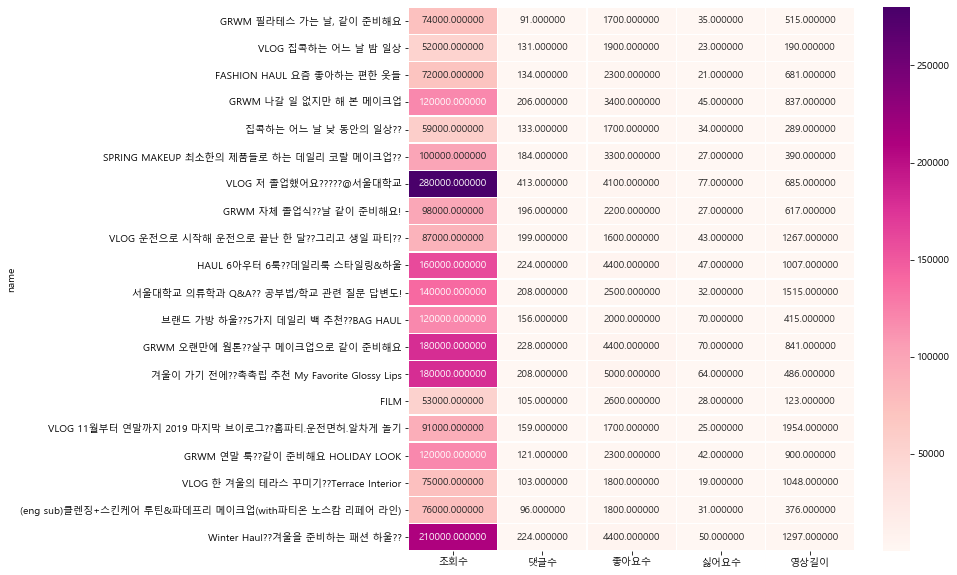

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(youtube[['조회수','댓글수',
                                  '좋아요수','싫어요수','영상길이']],
            annot=True,fmt= 'f',cmap='RdPu',linewidths =.5)


In [16]:
you = np.polyfit(youtube['댓글수'],youtube['조회수'],1)
u1= np.poly1d(you)
print(u1)


 
715.9 x - 8616


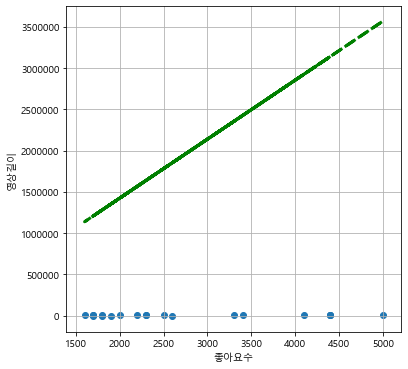

In [17]:
plt.figure(figsize=(6,6))
plt.plot(youtube['좋아요수'],u1(youtube['좋아요수']),lw=3,color='g',
                               ls='dashed')
plt.xlabel('좋아요수')
plt.ylabel('영상길이')
plt.scatter(youtube['좋아요수'],youtube['영상길이'])
plt.grid()

C:\Users\zmfkv\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


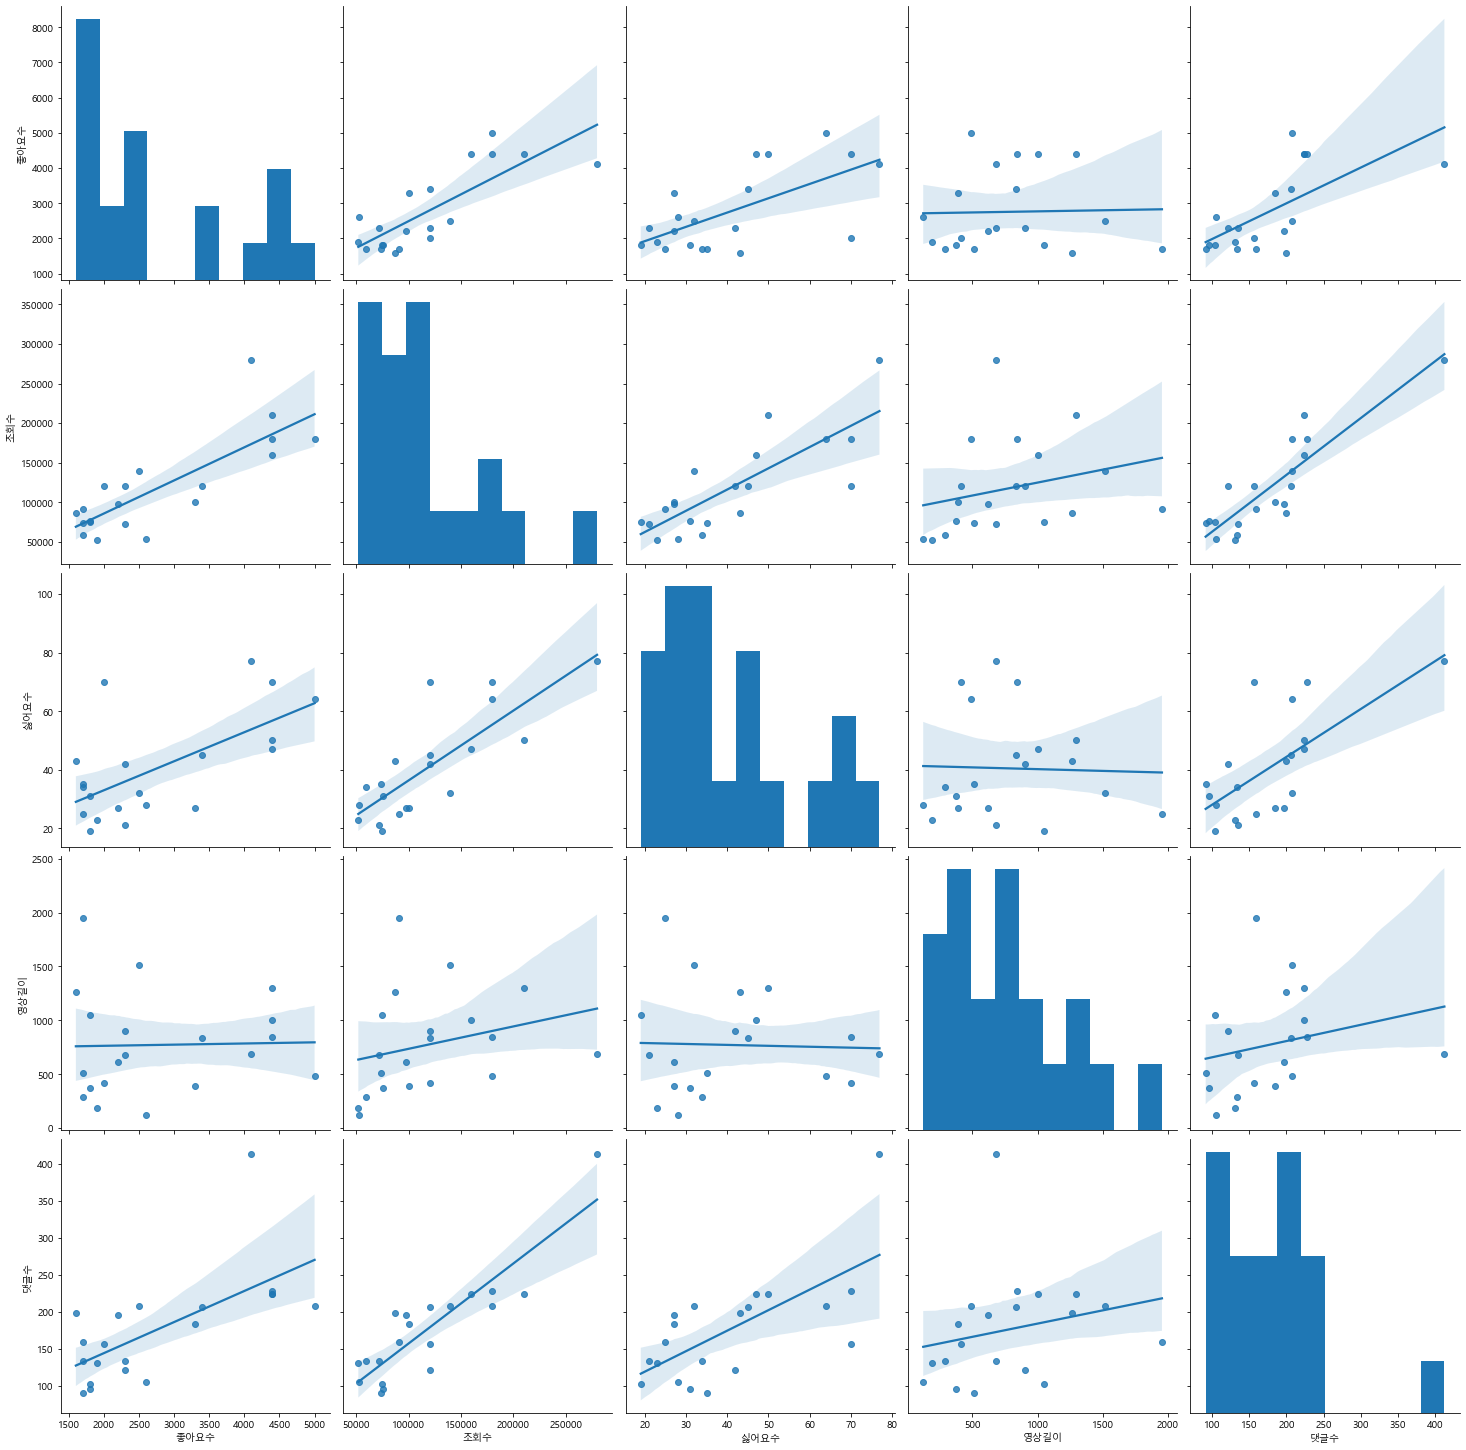

In [50]:
sns.pairplot(youtube,vars=['좋아요수','조회수','싫어요수','영상길이','댓글수'],size= 4,kind='reg')